In [3]:
import numpy as np 
import pandas as pd 
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [4]:
df = pd.read_csv("/home/pguser/Documents/creditcard.csv")
# First 5 rows of data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
#Normalize ‘Amount’

In [8]:
from sklearn.preprocessing import StandardScaler
df['Amount(Normalized)'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df.iloc[:,[29,31]].head()

,Amount,Amount(Normalized)
0,149.62,0.244964
1,2.69,-0.342475
2,378.66,1.160686
3,123.50,0.140534
4,69.99,-0.073403


In [9]:
df = df.drop(columns = ['Amount', 'Time'], axis=1) # This columns are not necessary anymore.

In [10]:
#Data PreProcessing

In [11]:
X = df.drop('Class', axis=1)
y = df['Class']

In [12]:
#Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# We are transforming data to numpy array to implementing with keras
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [14]:
#Artificial Neural Networks

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential([
    Dense(units=20, input_dim = X_train.shape[1], activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(units=20,activation='relu'),
    Dense(units=24,activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                600       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                504       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 2,133
Trainable params: 2,133
Non-trainable params: 0
____________________________________________________

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=30, epochs=5)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2022-10-17 14:01:53.418018: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-17 14:01:53.689031: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2899885000 Hz
2022-10-17 14:01:53.690200: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x558f929410d0 executing computations on platform Host. Devices:
2022-10-17 14:01:53.690274: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
OMP: Info #155: KMP_AFFINITY: Initial OS proc set respected: 0-5
OMP: Info #216: KMP_AFFINITY: decoding x2APIC ids.
OMP: Info #157: KMP_AFFINITY: 6 available OS procs
OMP: Info #158: KMP_AFFINITY: Uniform topology
OMP: Info #287: KMP_AFFINITY: topology layer 

2022-10-17 14:01:53.948753: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line flag, not via TF_XLA_FLAGS) or set the envvar XLA_FLAGS=--xla_hlo_profile.


Epoch 1/5


OMP: Info #254: KMP_AFFINITY: pid 17466 tid 20349 thread 1 bound to OS proc set 1
OMP: Info #254: KMP_AFFINITY: pid 17466 tid 20352 thread 3 bound to OS proc set 3
OMP: Info #254: KMP_AFFINITY: pid 17466 tid 20351 thread 2 bound to OS proc set 2
OMP: Info #254: KMP_AFFINITY: pid 17466 tid 20353 thread 4 bound to OS proc set 4
OMP: Info #254: KMP_AFFINITY: pid 17466 tid 20354 thread 5 bound to OS proc set 5
OMP: Info #254: KMP_AFFINITY: pid 17466 tid 20355 thread 6 bound to OS proc set 0


  2580/199364 [..............................] - ETA: 1:20 - loss: 0.2120 - accuracy: 0.9484

OMP: Info #254: KMP_AFFINITY: pid 17466 tid 20350 thread 7 bound to OS proc set 1
OMP: Info #254: KMP_AFFINITY: pid 17466 tid 20356 thread 8 bound to OS proc set 2
OMP: Info #254: KMP_AFFINITY: pid 17466 tid 20357 thread 9 bound to OS proc set 3
OMP: Info #254: KMP_AFFINITY: pid 17466 tid 20358 thread 10 bound to OS proc set 4
OMP: Info #254: KMP_AFFINITY: pid 17466 tid 20359 thread 11 bound to OS proc set 5
OMP: Info #254: KMP_AFFINITY: pid 17466 tid 20360 thread 12 bound to OS proc set 0


199364/199364 [==============================] - 11s 58us/step - loss: 0.0098 - accuracy: 0.9982
Epoch 2/5
199364/199364 [==============================] - 10s 52us/step - loss: 0.0040 - accuracy: 0.9993
Epoch 3/5
199364/199364 [==============================] - 10s 52us/step - loss: 0.0038 - accuracy: 0.9993
Epoch 4/5
199364/199364 [==============================] - 10s 52us/step - loss: 0.0034 - accuracy: 0.9994
Epoch 5/5
199364/199364 [==============================] - 10s 52us/step - loss: 0.0031 - accuracy: 0.9993


In [17]:
score = model.evaluate(X_test, y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(score[1]*100,score[0]))

85443/85443 [==============================] - 1s 16us/step
Test Accuracy: 99.94%
Test Loss: 0.0025784249395166426


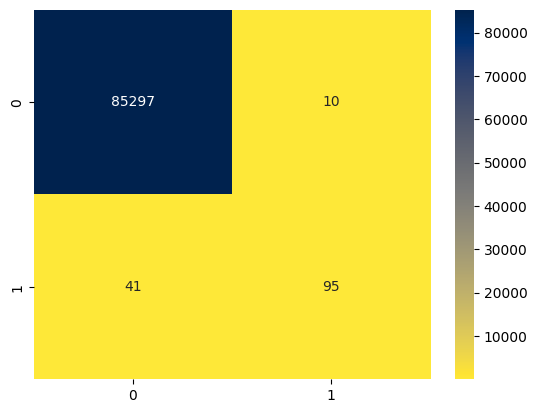

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot=True, fmt='.0f', cmap='cividis_r')
plt.show()

In [19]:
#Our results is fine however it is not the best way to do things like that. Since our dataset is unbalanced 
#(we have 492 frauds out of 284,807 transactions) we will use ‘smote sampling’. Basically smote turn our
#inbalanced data to balanced data

In [20]:
#SMOTE Sampling

In [24]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)
X_smote = pd.DataFrame(X_smote)
y_smote = pd.DataFrame(y_smote)
y_smote.iloc[:,0].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [22]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 1.6 MB/s eta 0:00:000:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 1.9 MB/s eta 0:00:000:00:010:00:01


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size = 30, epochs = 5)

Epoch 1/5
398041/398041 [==============================] - 21s 54us/step - loss: 0.0284 - accuracy: 0.9906
Epoch 2/5
398041/398041 [==============================] - 21s 54us/step - loss: 0.0101 - accuracy: 0.9975
Epoch 3/5
398041/398041 [==============================] - 21s 53us/step - loss: 0.0077 - accuracy: 0.9980
Epoch 4/5
398041/398041 [==============================] - 21s 53us/step - loss: 0.0069 - accuracy: 0.9984
Epoch 5/5
398041/398041 [==============================] - 21s 53us/step - loss: 0.0063 - accuracy: 0.9985


In [26]:
score = model.evaluate(X_test, y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(score[1]*100,score[0]))

170589/170589 [==============================] - 3s 16us/step
Test Accuracy: 99.87%
Test Loss: 0.005644957880584965


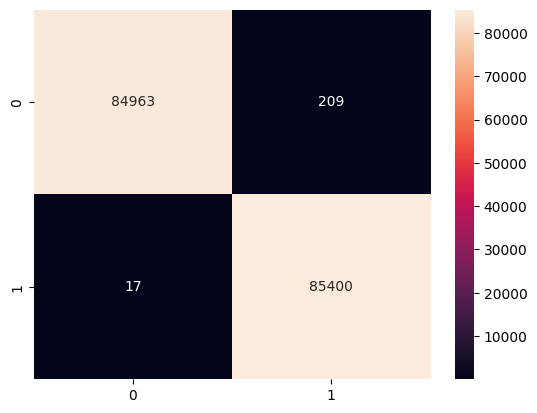

In [27]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

In [28]:
#It is not the true result ’cause we used data with smote sampling because of that number of class 0 and class 1
#are equal in here. That’s why we’ll use whole data we imported at the beginning.

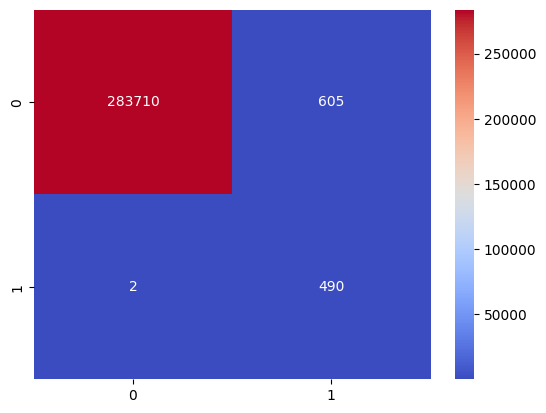

In [29]:
y_pred2 = model.predict(X)
y_test2 = pd.DataFrame(y)
cm2 = confusion_matrix(y_test2, y_pred2.round())
sns.heatmap(cm2, annot=True, fmt='.0f', cmap='coolwarm')
plt.show()

In [30]:
scoreNew = model.evaluate(X, y)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(scoreNew[1]*100,scoreNew[0]))

284807/284807 [==============================] - 4s 15us/step
Test Accuracy: 99.79%
Test Loss: 0.009345466599141948


In [31]:
print(classification_report(y_test2, y_pred2.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.45      1.00      0.62       492

    accuracy                           1.00    284807
   macro avg       0.72      1.00      0.81    284807
weighted avg       1.00      1.00      1.00    284807

